# 导入工具包

In [1]:
# opencv-python
import cv2

# mediapipe人工智能工具包
import mediapipe as mp

# 进度条库
from tqdm import tqdm

# 时间库
import time

# 导入python绘图matplotlib
import matplotlib.pyplot as plt
# 使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline

本代码的mediapipe版本为0.8.9.3

In [2]:
# 查看mediapipe版本
!pip show mediapipe

Name: mediapipe
Version: 0.8.9
Summary: MediaPipe is the simplest way for researchers and developers to build world-class ML solutions and applications for mobile, edge, cloud and the web.
Home-page: https://github.com/google/mediapipe
Author: The MediaPipe Authors
Author-email: mediapipe@google.com
License: Apache 2.0
Location: /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages
Requires: absl-py, attrs, matplotlib, numpy, opencv-contrib-python, protobuf, six, wheel
Required-by: 


In [3]:
# 定义可视化图像函数
def look_img(img):
    '''opencv读入图像格式为BGR，matplotlib可视化格式为RGB，因此需将BGR转RGB'''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

# 导入模型、输入图像、执行预测

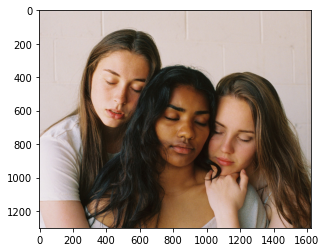

In [4]:
mp_face_detection = mp.solutions.face_detection

model = mp_face_detection.FaceDetection(   
        min_detection_confidence=0.5, # 置信度阈值，过滤掉小于置信度的预测框
        model_selection=0,            # 选择模型，0适用于人脸距离镜头近（2米以内），1适用于人脸距离镜头远（5米以内）
)
# 从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('images/A-0.jpeg')
look_img(img)
# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 将RGB图像输入模型，获取预测结果
results = model.process(img_RGB)

In [5]:
results

mediapipe.python.solution_base.SolutionOutputs

In [6]:
# 人脸预测结果
results.detections

[label_id: 0
 score: 0.9498377442359924
 location_data {
   format: RELATIVE_BOUNDING_BOX
   relative_bounding_box {
     xmin: 0.1718713492155075
     ymin: 0.2578398585319519
     width: 0.22891630232334137
     height: 0.28610169887542725
   }
   relative_keypoints {
     x: 0.267341673374176
     y: 0.33216360211372375
   }
   relative_keypoints {
     x: 0.3546595871448517
     y: 0.364169716835022
   }
   relative_keypoints {
     x: 0.3117963969707489
     y: 0.42476582527160645
   }
   relative_keypoints {
     x: 0.2929651439189911
     y: 0.47466403245925903
   }
   relative_keypoints {
     x: 0.18545641005039215
     y: 0.31960126757621765
   }
   relative_keypoints {
     x: 0.3756771981716156
     y: 0.3867529630661011
   }
 },
 label_id: 0
 score: 0.9398595094680786
 location_data {
   format: RELATIVE_BOUNDING_BOX
   relative_bounding_box {
     xmin: 0.4074995517730713
     ymin: 0.43037283420562744
     width: 0.21761226654052734
     height: 0.27197402715682983
   }


In [7]:
# 检测出的人脸个数
len(results.detections)

3

# 解析索引为0的人脸预测结果

In [8]:
results.detections[0]

label_id: 0
score: 0.9498377442359924
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.1718713492155075
    ymin: 0.2578398585319519
    width: 0.22891630232334137
    height: 0.28610169887542725
  }
  relative_keypoints {
    x: 0.267341673374176
    y: 0.33216360211372375
  }
  relative_keypoints {
    x: 0.3546595871448517
    y: 0.364169716835022
  }
  relative_keypoints {
    x: 0.3117963969707489
    y: 0.42476582527160645
  }
  relative_keypoints {
    x: 0.2929651439189911
    y: 0.47466403245925903
  }
  relative_keypoints {
    x: 0.18545641005039215
    y: 0.31960126757621765
  }
  relative_keypoints {
    x: 0.3756771981716156
    y: 0.3867529630661011
  }
}

>获取全图宽高

In [9]:
h, w = img.shape[0], img.shape[1]
print('全图高{}像素，宽{}像素'.format(h,w))

全图高1301像素，宽1626像素


>置信度

In [10]:
results.detections[0].score[0]

0.9498377442359924

>预测框左上角坐标

In [11]:
# 左上角横坐标相对坐标
results.detections[0].location_data.relative_bounding_box.xmin

0.1718713492155075

In [12]:
# 左上角横坐标像素坐标
int(results.detections[0].location_data.relative_bounding_box.xmin * w)

279

In [13]:
# 左上角纵坐标相对坐标
results.detections[0].location_data.relative_bounding_box.ymin

0.2578398585319519

In [14]:
# 左上角纵坐标像素坐标
int(results.detections[0].location_data.relative_bounding_box.ymin * h)

335

> 预测框宽高

In [15]:
# 预测框相对宽度
results.detections[0].location_data.relative_bounding_box.width

0.22891630232334137

In [16]:
# 预测框像素宽度
int(results.detections[0].location_data.relative_bounding_box.width * w)

372

In [17]:
# 预测框相对高度
results.detections[0].location_data.relative_bounding_box.height

0.28610169887542725

In [18]:
# 预测框像素高度
int(results.detections[0].location_data.relative_bounding_box.height * h)

372

> 人脸关键点坐标

In [19]:
results.detections[0].location_data.relative_keypoints

[x: 0.267341673374176
y: 0.33216360211372375
, x: 0.3546595871448517
y: 0.364169716835022
, x: 0.3117963969707489
y: 0.42476582527160645
, x: 0.2929651439189911
y: 0.47466403245925903
, x: 0.18545641005039215
y: 0.31960126757621765
, x: 0.3756771981716156
y: 0.3867529630661011
]

In [20]:
# 索引为0的关键点的横坐标相对坐标
results.detections[0].location_data.relative_keypoints[0].x

0.267341673374176

In [21]:
# 索引为0的关键点的横坐标像素坐标
int(results.detections[0].location_data.relative_keypoints[0].x * w)

434

# 可视化索引为0的人脸框

In [22]:
top_X = int(results.detections[0].location_data.relative_bounding_box.xmin * w)
top_Y = int(results.detections[0].location_data.relative_bounding_box.ymin * h)
bbox_width = int(results.detections[0].location_data.relative_bounding_box.width * w)
bbox_height = int(results.detections[0].location_data.relative_bounding_box.height * h)

In [23]:
# 绘制人脸矩形框，左上角坐标，右下角坐标，颜色，线宽
img = cv2.rectangle(img, (top_X, top_Y),(top_X+bbox_width, top_Y+bbox_height),(180,187,28),15)

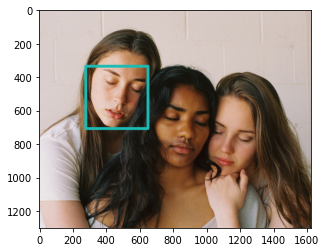

In [24]:
look_img(img)

# 可视化索引为0的关键点

In [25]:
cx = int(results.detections[0].location_data.relative_keypoints[0].x * w)
cy = int(results.detections[0].location_data.relative_keypoints[0].y * h)

In [26]:
cx, cy

(434, 432)

In [27]:
img = cv2.circle(img,(cx,cy), 20, (0,255,0), -1)

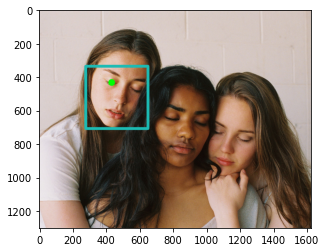

In [28]:
look_img(img)

# 用不同的颜色展示不同的人脸框

In [29]:
# 设置颜色列表，BGR
color_list = [(66,77,229),(223,155,6),(94,218,121),(180,187,28),(77,169,10),(1,240,255)]

# 检测出的人脸个数
face_num = len(results.detections)

for i in range(face_num): # 遍历每一个人脸框
    top_X = int(results.detections[i].location_data.relative_bounding_box.xmin * w)
    top_Y = int(results.detections[i].location_data.relative_bounding_box.ymin * h)
    bbox_width = int(results.detections[i].location_data.relative_bounding_box.width * w)
    bbox_height = int(results.detections[i].location_data.relative_bounding_box.height * h)
    # 绘制人脸矩形框，左上角坐标，右下角坐标，颜色，线宽
    img = cv2.rectangle(img, (top_X, top_Y),(top_X+bbox_width, top_Y+bbox_height),color_list[i%face_num],15)

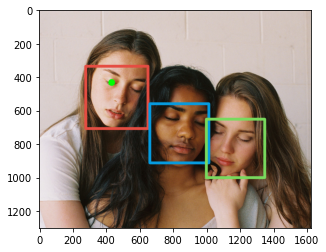

In [30]:
look_img(img)

# 小作业：用不同的颜色，展示不同的关键点

# 小作业：测试人脸个数很多的图片